----

# 앙상블 분석

- 참고 : http://r-bong.blogspot.com/2016/10/adabag.html

----

## 1. Load Library

필요한 라이브러리를 불러온다. 설치가 안되어 있을 경우 패키지를 설치한다.

In [8]:
library(adabag)
library(partykit)
data(iris)

## 2. Enssemble Model

앙상플 모델링을 진행한다. mfinal은 기본적으로 100이며 이 값은 bootstrap 반복실행의 횟수나 몇 개의 tree를 이용하는지에 대한 값을 의미한다.

In [10]:
iris.bag <- bagging(Species~. , data=iris, mfinal=10)

In [16]:
iris.bag$tree[[10]]

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 89 virginica (0.29333333 0.30000000 0.40666667)  
  2) Petal.Length< 4.95 90 46 setosa (0.48888889 0.48888889 0.02222222)  
    4) Petal.Length< 2.6 44  0 setosa (1.00000000 0.00000000 0.00000000) *
    5) Petal.Length>=2.6 46  2 versicolor (0.00000000 0.95652174 0.04347826) *
  3) Petal.Length>=4.95 60  1 virginica (0.00000000 0.01666667 0.98333333) *

## 3. Validation

변수의 중요도를 확인해본다.

In [13]:
iris.bag$importance

Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
    64.38705     35.61295      0.00000      0.00000

## 4. Visualization

해당 결과를 시각화 해본다.

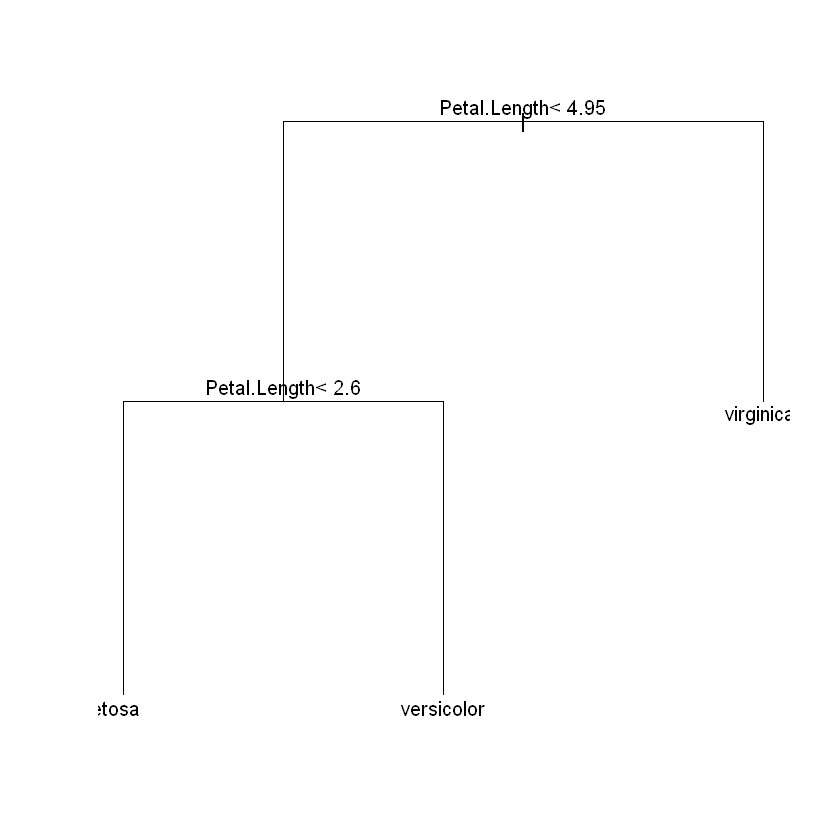

In [15]:
plot(iris.bag$tree[[10]])
text(iris.bag$tree[[10]])

## 5. Predict

만들어진 모형으로 예측을 해본다.

In [25]:
pred <- predict(iris.bag, newdata=iris)
table(pred$class, iris[,5])

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         5
  virginica       0          2        45

결과를 보면 잘 분리 된 것을 확인 가능

----